In [627]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
import random

#PREPROCESS TEST DATA

In [628]:
train_labels = []
train_samples = []

In [629]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

In [630]:
# we must have to randomize the list to get uniform distribution
d=list(zip(train_samples,train_labels))
random.shuffle(d)

In [631]:
train_labels=[]
train_samples=[]
for i,j in d:
    train_samples.append(i)
    train_labels.append(j)   
    

In [632]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [633]:
scaler = MinMaxScaler(feature_range=(0,1))
print(np.shape(train_samples))
# we have to reshape bcoz fit_transform doesn't takes 1-d array as argument,it's just technical formality
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))
# scaled_train_samples=scaled_train_samples.reshape(2100,),we may or may not need this line
for i in scaled_train_samples:
    print(i)

(2100,)
[0.20689655]
[0.11494253]
[0.16091954]
[0.11494253]
[0.32183908]
[0.74712644]
[0.50574713]
[0.74712644]
[0.43678161]
[0.67816092]
[0.66666667]
[0.87356322]
[0.09195402]
[0.6091954]
[0.51724138]
[0.68965517]
[0.54022989]
[0.06896552]
[0.82758621]
[0.1954023]
[0.8045977]
[0.56321839]
[0.70114943]
[0.4137931]
[0.52873563]
[0.47126437]
[0.51724138]
[0.62068966]
[0.36781609]
[0.90804598]
[0.71264368]
[0.13793103]
[0.8045977]
[0.13793103]
[0.47126437]
[0.71264368]
[0.28735632]
[0.55172414]
[0.55172414]
[0.44827586]
[0.81609195]
[0.75862069]
[0.26436782]
[0.87356322]
[0.49425287]
[0.3908046]
[0.59770115]
[1.]
[0.13793103]
[0.59770115]
[0.64367816]
[0.73563218]
[0.8045977]
[0.62068966]
[0.34482759]
[0.]
[0.36781609]
[0.05747126]
[0.6091954]
[0.25287356]
[0.68965517]
[0.90804598]
[0.70114943]
[0.02298851]
[0.26436782]
[0.73563218]
[0.04597701]
[0.37931034]
[0.91954023]
[0.4137931]
[0.64367816]
[0.95402299]
[0.47126437]
[0.82758621]
[0.71264368]
[0.]
[0.42528736]
[0.71264368]
[0.22988506

#creating artificial neural net

In [634]:
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [635]:
model=Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [636]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 16)                32        
_________________________________________________________________
dense_104 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_105 (Dense)            (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [637]:
model.compile(Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#training artificial neural net

In [638]:
model.fit(scaled_train_samples, train_labels, validation_split=0.1, batch_size=10, epochs=20, shuffle=True, verbose=2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 0s - loss: 0.6827 - accuracy: 0.6365 - val_loss: 0.6724 - val_accuracy: 0.5905
Epoch 2/20
 - 0s - loss: 0.6613 - accuracy: 0.6222 - val_loss: 0.6512 - val_accuracy: 0.6857
Epoch 3/20
 - 0s - loss: 0.6396 - accuracy: 0.7143 - val_loss: 0.6300 - val_accuracy: 0.7238
Epoch 4/20
 - 0s - loss: 0.6199 - accuracy: 0.7328 - val_loss: 0.6102 - val_accuracy: 0.7524
Epoch 5/20
 - 0s - loss: 0.5999 - accuracy: 0.7619 - val_loss: 0.5892 - val_accuracy: 0.7714
Epoch 6/20
 - 0s - loss: 0.5785 - accuracy: 0.7852 - val_loss: 0.5667 - val_accuracy: 0.7952
Epoch 7/20
 - 0s - loss: 0.5563 - accuracy: 0.8079 - val_loss: 0.5440 - val_accuracy: 0.8095
Epoch 8/20
 - 0s - loss: 0.5339 - accuracy: 0.8265 - val_loss: 0.5211 - val_accuracy: 0.8143
Epoch 9/20
 - 0s - loss: 0.5113 - accuracy: 0.8323 - val_loss: 0.4972 - val_accuracy: 0.8381
Epoch 10/20
 - 0s - loss: 0.4873 - accuracy: 0.8508 - val_loss: 0.4723 - val_accuracy: 0.8524
Epoch 11/20
 - 0s - lo

##validation set = some % of training set,on which we validate

In [639]:
print(type(scaled_train_samples))

<class 'numpy.ndarray'>


#PREDICTION

In [640]:
##Preprocess Test Data

In [641]:
test_samples = []
test_labels = []

In [642]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)   

#test_samples = []
#for i in range(50):
    #test_samples.append(randint(13,100))

In [643]:
test_samples = np.array(test_samples)
test_labels  = np.array(test_labels)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

#PREDICTIONS

In [644]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [645]:
c = np.hstack((test_samples.reshape(-1,1),predictions))

In [646]:
#for i in c:
#    print(i)
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)
d=np.hstack((test_samples.reshape(-1,1),rounded_predictions.reshape(-1,1)))
e=np.hstack((test_labels.reshape(-1,1),rounded_predictions.reshape(-1,1)))
for i in d:
    print(i)
print(test_labels)
print(rounded_predictions)
for i in e:
    print(i)

[15  0]
[98  1]
[38  0]
[73  1]
[58  0]
[65  1]
[37  0]
[87  1]
[60  0]
[96  1]
[16  0]
[70  1]
[31  0]
[88  1]
[33  0]
[65  1]
[25  0]
[99  1]
[47  0]
[89  1]
[63  1]
[65  1]
[30  0]
[79  1]
[41  0]
[66  1]
[38  0]
[85  1]
[63  1]
[73  1]
[60  0]
[77  1]
[19  0]
[83  1]
[64  1]
[84  1]
[17  0]
[69  1]
[57  0]
[71  1]
[41  0]
[95  1]
[27  0]
[89  1]
[57  0]
[75  1]
[46  0]
[93  1]
[54  0]
[80  1]
[55  0]
[100   1]
[45  0]
[72  1]
[35  0]
[94  1]
[53  0]
[72  1]
[61  1]
[93  1]
[37  0]
[90  1]
[28  0]
[72  1]
[33  0]
[84  1]
[22  0]
[99  1]
[64  1]
[70  1]
[41  0]
[67  1]
[41  0]
[100   1]
[61  1]
[100   1]
[61  1]
[89  1]
[24  0]
[83  1]
[64  1]
[69  1]
[49  0]
[85  1]
[27  0]
[95  1]
[47  0]
[89  1]
[48  0]
[73  1]
[37  0]
[77  1]
[53  0]
[69  1]
[26  0]
[70  1]
[13  0]
[72  1]
[26  0]
[96  1]
[52  0]
[71  1]
[19  0]
[98  1]
[36  0]
[73  1]
[50  0]
[79  1]
[56  0]
[97  1]
[18  0]
[72  1]
[15  0]
[89  1]
[32  0]
[80  1]
[47  0]
[67  1]
[27  0]
[88  1]
[43  0]
[67  1]
[32  0]
[87  1]
[4

In [647]:
#CREATING CONFUSION MARIRIX

In [648]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, rounded_predictions)
def plot_confusion_matrix(cm,classes,normalize=False,
                          title='confusion_matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap= cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('confusion  matrix without normalization')
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment='center',
                 color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

confusion  matrix without normalization
[[181  29]
 [ 10 200]]


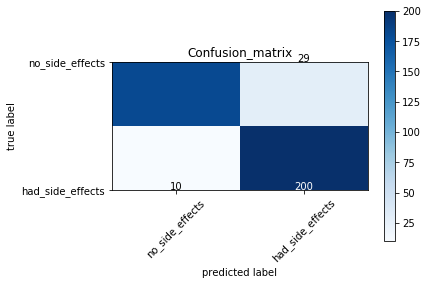

In [649]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')
